## **Import Libraries**

In [88]:
import numpy as np
import matplotlib.pyplot as plt

## **Data Generation and Preprocessing**

In [89]:
# Data Generation
np.random.seed(0)
square = np.random.randn(100, 2) + np.array([-6, 6])
diamond = np.random.randn(100, 2) + np.array([6, -6])
hexagon = np.random.randn(100, 2) + np.array([0, 0])

X = np.vstack([square, diamond, hexagon])
Y = np.array([0] * 100 + [1] * 100 + [2] * 100).reshape(-1, 1)

## **One-Hot Encoding**

In [90]:
# One-hot encoding labels
num_classes = len(np.unique(Y))
Y_one_hot = np.zeros((Y.size, num_classes))
Y_one_hot[np.arange(Y.size), Y.flatten()] = 1

## **Custom Train-Test Split**

In [91]:
# Train-Test Split
def train_test_split(X, Y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices, train_indices = indices[:test_size], indices[test_size:]
    return X[train_indices], X[test_indices], Y[train_indices], Y[test_indices]

X_train, X_val, Y_train, Y_val = train_test_split(X, Y_one_hot, test_size=0.2, random_state=0)

## **Dataset Visualization**

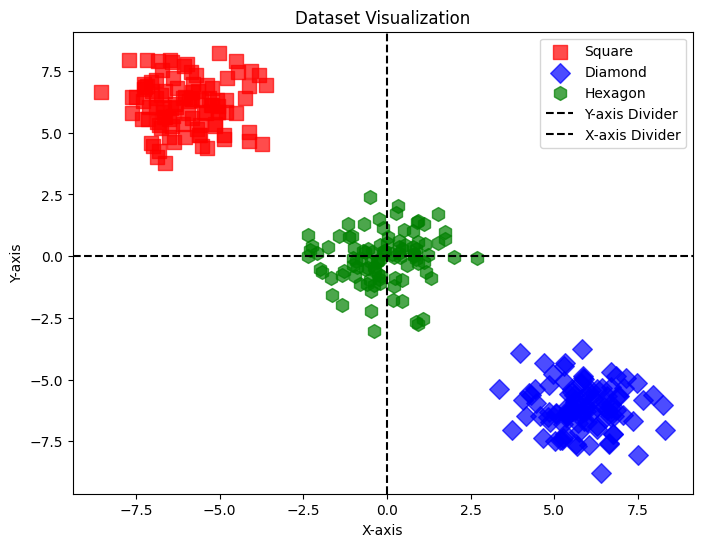

In [92]:
# Dataset Visualization
plt.figure(figsize=(8, 6))
plt.scatter(square[:, 0], square[:, 1], color='red', label='Square', marker='s', alpha=0.7, s=100)
plt.scatter(diamond[:, 0], diamond[:, 1], color='blue', label='Diamond', marker='D', alpha=0.7, s=100)
plt.scatter(hexagon[:, 0], hexagon[:, 1], color='green', label='Hexagon', marker='h', alpha=0.7, s=100)
plt.axhline(y=0, color='black', linestyle='--', label='Y-axis Divider')  # Y-axis divider
plt.axvline(x=0, color='black', linestyle='--', label='X-axis Divider')  # X-axis divider
plt.title('Dataset Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

## **Neural Network Implementation**

In [93]:
# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.W_H1 = np.random.randn(input_neurons, hidden_neurons)
        self.B_H1 = np.zeros((1, hidden_neurons))
        self.W_H2 = np.random.randn(hidden_neurons, hidden_neurons)
        self.B_H2 = np.zeros((1, hidden_neurons))
        self.W_H3 = np.random.randn(hidden_neurons, hidden_neurons)
        self.B_H3 = np.zeros((1, hidden_neurons))
        self.W_OH = np.random.randn(hidden_neurons, output_neurons)
        self.B_OH = np.zeros((1, output_neurons))

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self, X):
        self.hidden_input1 = np.dot(X, self.W_H1) + self.B_H1
        self.hidden_output1 = self.sigmoid(self.hidden_input1)
        self.hidden_input2 = np.dot(self.hidden_output1, self.W_H2) + self.B_H2
        self.hidden_output2 = self.sigmoid(self.hidden_input2)
        self.hidden_input3 = np.dot(self.hidden_output2, self.W_H3) + self.B_H3
        self.hidden_output3 = self.sigmoid(self.hidden_input3)
        self.output_input = np.dot(self.hidden_output3, self.W_OH) + self.B_OH
        pred = self.sigmoid(self.output_input)
        return pred, self.hidden_output1, self.hidden_output2, self.hidden_output3

    def back_propagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = output_error * self.sigmoid(pred, der=True)
        hidden_error3 = output_delta.dot(self.W_OH.T)
        hidden_delta3 = hidden_error3 * self.sigmoid(self.hidden_output3, der=True)
        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = hidden_error2 * self.sigmoid(self.hidden_output2, der=True)
        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.hidden_output1, der=True)
        self.W_OH += self.hidden_output3.T.dot(output_delta) * self.learning_rate
        self.B_OH += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.W_H3 += self.hidden_output2.T.dot(hidden_delta3) * self.learning_rate
        self.B_H3 += np.sum(hidden_delta3, axis=0, keepdims=True) * self.learning_rate
        self.W_H2 += self.hidden_output1.T.dot(hidden_delta2) * self.learning_rate
        self.B_H2 += np.sum(hidden_delta2, axis=0, keepdims=True) * self.learning_rate
        self.W_H1 += X.T.dot(hidden_delta1) * self.learning_rate
        self.B_H1 += np.sum(hidden_delta1, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, Y, epochs=2000):
        err = []
        for epoch in range(epochs):
            pred, _, _, _ = self.feed_forward(X)
            self.back_propagation(X, Y, pred)
            loss = np.mean(np.square(Y - pred))
            err.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return err

    def predict(self, X):
        pred, _, _, _ = self.feed_forward(X)
        return np.argmax(pred, axis=1)

## **Training**

In [94]:
# Train the Neural Network
NN = NeuralNetwork(input_neurons=2, hidden_neurons=10, output_neurons=num_classes, learning_rate=0.05)
losses = NN.train(X_train, Y_train, epochs=2000)

Epoch 0, Loss: 0.2521
Epoch 100, Loss: 0.0010
Epoch 200, Loss: 0.0004
Epoch 300, Loss: 0.0002
Epoch 400, Loss: 0.0002
Epoch 500, Loss: 0.0001
Epoch 600, Loss: 0.0001
Epoch 700, Loss: 0.0001
Epoch 800, Loss: 0.0001
Epoch 900, Loss: 0.0001
Epoch 1000, Loss: 0.0001
Epoch 1100, Loss: 0.0000
Epoch 1200, Loss: 0.0000
Epoch 1300, Loss: 0.0000
Epoch 1400, Loss: 0.0000
Epoch 1500, Loss: 0.0000
Epoch 1600, Loss: 0.0000
Epoch 1700, Loss: 0.0000
Epoch 1800, Loss: 0.0000
Epoch 1900, Loss: 0.0000


## **Loss and Predictions Visualization**

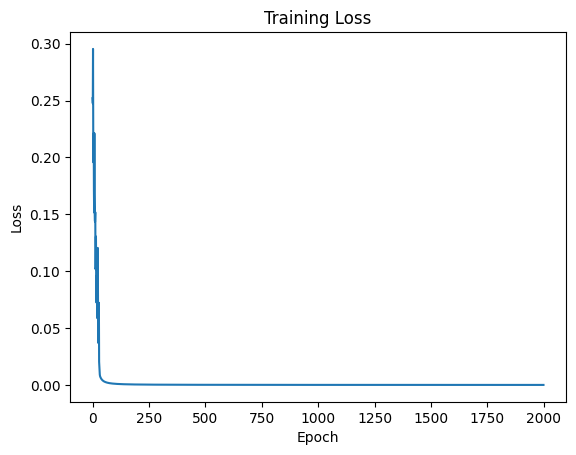

In [95]:
# Loss Visualization
plt.plot(range(len(losses)), losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## **Model Performance Evaluation**

In [96]:
# Evaluate Model Performance
predictions = NN.predict(X_val)
true_labels = np.argmax(Y_val, axis=1)
accuracy = np.mean(predictions == true_labels)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


## **Visualize Predictions**

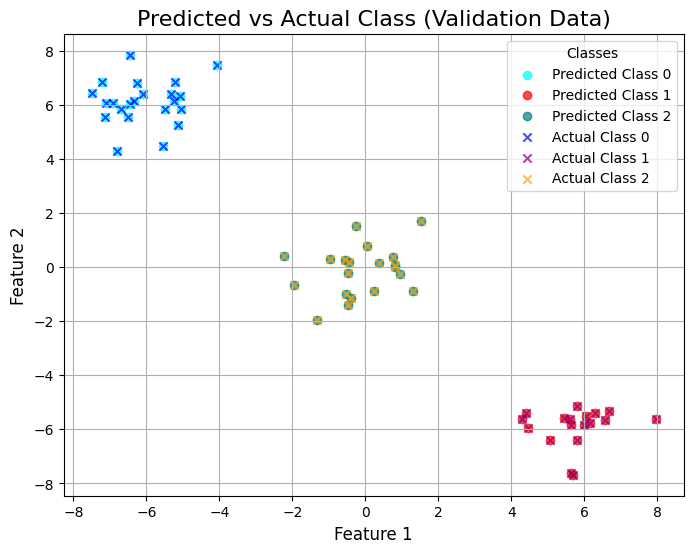

In [97]:
# Validation
def plot_predicted_vs_actual(X, Y, title="Predicted vs Actual Class"):
    predictions, _, _, _ = NN.feed_forward(X)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(Y, axis=1)
    plt.figure(figsize=(8, 6))
    predicted_class_colors = ['cyan', 'red', 'teal']
    actual_class_colors = ['blue', 'purple', 'orange']
    predicted_marker = 'o'
    actual_marker = 'x'
    for class_idx in range(3):
        plt.scatter(
            X[predicted_classes == class_idx, 0],
            X[predicted_classes == class_idx, 1],
            color=predicted_class_colors[class_idx],
            label=f"Predicted Class {class_idx}",
            marker=predicted_marker,
            alpha=0.7
        )
    for class_idx in range(3):
        plt.scatter(
            X[true_classes == class_idx, 0],
            X[true_classes == class_idx, 1],
            color=actual_class_colors[class_idx],
            label=f"Actual Class {class_idx}",
            marker=actual_marker,
            alpha=0.7
        )
    plt.title(title, fontsize=16)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend(title="Classes", loc='upper right')
    plt.grid(True)
    plt.show()

plot_predicted_vs_actual(X_val, Y_val, "Predicted vs Actual Class (Validation Data)")